Check the hyperparameters in the successful fits.  

Calculate the cutoff for a successful fit within a confidence region, based on the assumption that the difference of the nllh's of the true and optimal parameter is chi^2 distributed with n_theta degrees of freedom.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

import sys
from pathlib import Path
sys.path.append(str(Path(".").resolve().parent))

from helpers_boehm import load_exp_summary

dir_pipeline = Path(".").resolve().parents[1]
dir_5 = dir_pipeline / "5_optimisation"
output_path = Path(".") / "hyperparameters"
output_path.mkdir(exist_ok=True)

In [2]:
likelihood: str = "negLL_obs_trainval"
percentile: float = 95

SIMULTANEOUS = "simultaneous"
POINTWISE = "pointwise"
cr_option = POINTWISE

In [3]:
# import the results
problem_name = "Boehm_papb_differential_BaF3_Epo"
experiment_name = "2024_08_21_" + problem_name

summary = load_exp_summary(dir_5 / experiment_name).sort_values(by=likelihood)

# add reg bins
bins_reg = [-1, 1e-4,    1e-2,  1e-1,   1]
labels_reg = ["0", "<0.01", "<0.1", "<1"]
# bins_reg = [-1] + [10**x for x in [-3, -2.5, -2, -1.5, -1, -0.5, 0]]
# labels_reg = ["0", "3-2.5", "2.5-2", "2-1.5", "1.5-1", "1-0.5", "0.5-0"]
summary["regbin"] = pd.cut(summary['λ_reg'], bins=bins_reg, labels=labels_reg)

# add learning rate bins
# bins_lr = [1e-4,   1e-3,    1e-2]
# labels_lr = ["<0.001", "<0.01"]
bins_lr = [10**x for x in [-4, -3.5, -3, -2.5, -2]]
labels_lr = ["4-3.5", "3.5-3", '3-2.5', '2.5-2']
summary["lr_bin"] = pd.cut(summary['lr_adam'], bins=bins_lr, labels=labels_lr)

hyperprameters = ["regbin", "lr_bin", "nn_input_normalization"]

summary["regbin"].value_counts()

regbin
<0.1     807
<1       806
<0.01    770
0        613
Name: count, dtype: int64

In [4]:
# optimal point as base:
fval_opt = summary[likelihood][0]
if cr_option == SIMULTANEOUS:
    # degrees of freedom is equal to the number of parameters
    df = 9 + 117  # theta_MM + theta_ANN
elif cr_option == POINTWISE:
    # degrees of freedom is equal to 1
    df = 1

range = chi2.ppf(q=percentile / 100, df=df)

cut_off = fval_opt + range

print('optimal fval ', fval_opt)
print('threshold    ', cut_off)
print('# within CR: ', summary[summary[likelihood] < cut_off].shape[0], "/", summary.shape[0])

optimal fval  125.4635511830196
threshold     129.30501000371373
# within CR:  68 / 2996


In [5]:
best = summary.iloc[:24]    # max. 24
# best = summary[summary[likelihood] < cut_off]

best

,ude_nr,problem_name,noise_level,sparsity,hidden_layers,hidden_neurons,act_fct,nn_input_normalization,startpoint_method,startpoint_id,...,nmse_hidden_test,negLL_obs_train,negLL_obs_val,negLL_obs_trainval,negLL_obs_test,sd_pSTAT5A_rel,sd_pSTAT5B_rel,sd_rSTAT5A_rel,regbin,lr_bin
295,296,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,296,...,NaN,67.440235,13.653314,81.093549,NaN,2.913595,4.500670,2.984598,<0.1,3-2.5
365,366,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,366,...,NaN,76.077674,16.455261,92.532935,NaN,3.285075,5.302176,4.465019,0,2.5-2
394,395,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,395,...,NaN,82.379514,11.743350,94.122864,NaN,1.557995,5.331508,4.200703,0,2.5-2
688,690,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,1,lhs,690,...,NaN,79.603214,15.106029,94.709243,NaN,3.074839,6.392518,5.252801,<0.01,4-3.5
47,48,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,48,...,NaN,79.293983,15.437995,94.731978,NaN,2.821265,6.610478,5.353457,<1,4-3.5
224,225,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,225,...,NaN,80.012498,16.253811,96.266309,NaN,3.027776,6.628878,5.167380,0,3-2.5
32,33,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,33,...,NaN,81.333507,17.871767,99.205274,NaN,3.078427,7.218688,5.263688,0,4-3.5
98,99,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,99,...,NaN,82.310973,17.082100,99.393072,NaN,3.148527,7.246656,5.424823,<1,3-2.5
1458,1461,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,0,lhs,1461,...,NaN,84.199846,15.462858,99.662704,NaN,3.525479,6.851193,4.924319,<0.1,3-2.5
269,270,boehm_papb_differential_BaF3_Epo,-,16,3,5,tanh,1,lhs,270,...,NaN,83.382495,16.332181,99.714677,NaN,3.112883,6.922313,5.688472,<0.1,3-2.5


/tmp/ipykernel_1187610/3076442876.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1187610/3076442876.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


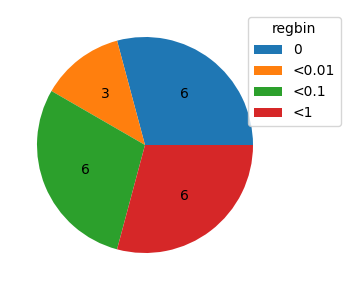

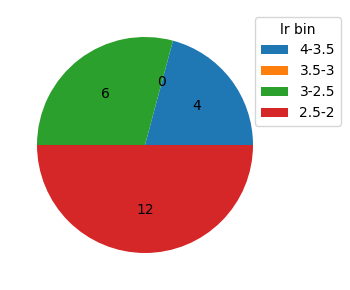

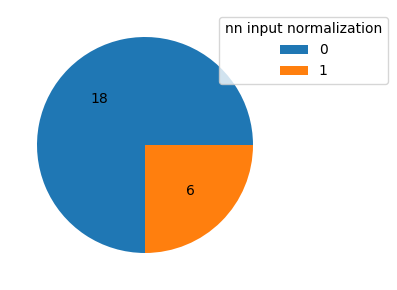

In [6]:
for hp in hyperprameters:
    fig, ax = plt.subplots(figsize=(5, 3))
    # calc and sort the # fits/hp setting
    hp2plot = best[hp].value_counts().sort_index()

    def absolute_value(val):
        a  = int(val/100.*hp2plot.values.sum())
        return a

    wedges, texts, autotexts = ax.pie(
        hp2plot.values, autopct=absolute_value,
    )
    ax.legend(
        wedges, hp2plot.index,
        title=hp2plot.index.name.replace("_", " "),
        bbox_to_anchor=(0.75, 0, 0.5, 1)
    )
    fig.show()
    fig.tight_layout()
    fig.savefig(output_path / f"pie_{hp}.svg", transparent=True)